Gates' full, raw (unedited) code
Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=715)


In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers

2023-11-24 03:22:07.549642: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 03:22:07.588365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

## Importing the data

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

## Normalizing the data

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Check data and shapes

In [4]:
print(X_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
print(y_train[4])

9


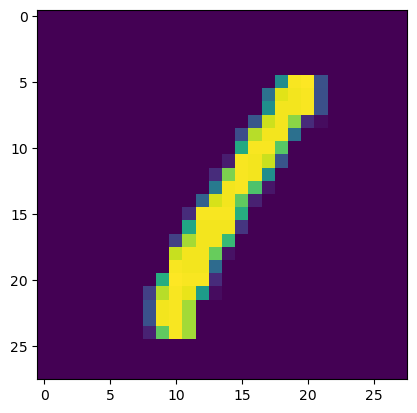

In [6]:
plt.imshow(X_train[3]) 

In [7]:
print(X_train.shape)
print(X_train.shape[1:])

(60000, 28, 28)
(28, 28)


In [8]:
print(y_train.shape)

(60000,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


# Build the model

In [10]:
model = tensorflow.keras.models.Sequential()

2023-11-24 03:22:11.036391: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


## Adding the model layers

The number of units is the number of neurons connected to the layer holding the concatenated vector of hidden state and input

In [11]:
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.LSTM(128))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(10, activation='softmax'))

2023-11-24 03:22:11.477172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-24 03:22:11.478953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-24 03:22:11.481374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

## Compiling the model

In [12]:
model.compile( loss='sparse_categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-6), metrics=['accuracy'] )

## Fitting data to the model

In [13]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3


2023-11-24 03:22:12.461990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-24 03:22:12.465875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-24 03:22:12.468364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1874/1875 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8943

2023-11-24 03:23:54.940137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-24 03:23:54.942231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-24 03:23:54.945119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1875/1875 [==============================] - 109s 56ms/step - loss: 0.3367 - accuracy: 0.8944 - val_loss: 0.1145 - val_accuracy: 0.9642
Epoch 2/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1035 - accuracy: 0.9705 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0705 - accuracy: 0.9795 - val_loss: 0.0669 - val_accuracy: 0.9800


# Evaluating the test loss and accuracy

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

313/313 [==============================] - 7s 22ms/step - loss: 0.0669 - accuracy: 0.9800
Test Loss: 0.06691638380289078
Test Accuracy: 0.9800000190734863


## visualizing the change in the validation loss

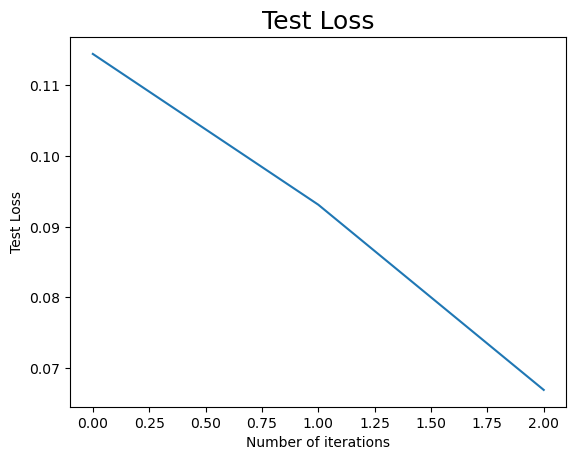

In [15]:
plt.plot(val_loss) 
plt.title("Test Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Loss") 
plt.show() 

## visualizing the change in the accuracy

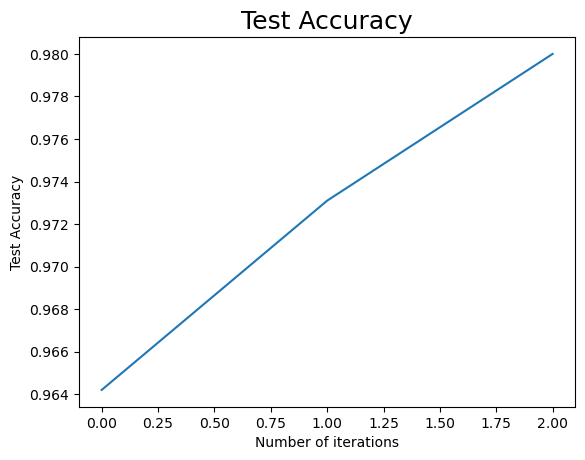

In [16]:
plt.plot(val_acc) 
plt.title("Test Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Accuracy") 
plt.show() 